In [1]:
# Teo Tze Shuen
# S10204885
# Diploma in Accountancy
# TA24

In [2]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# other misc stuff related to libraries
sns.set_theme(style='white')
# set figure size
sns.set(rc={'figure.figsize':(9,6)})

In [4]:
df = pd.read_excel('Fraud_Data_Final.xlsx')
df.info() 
# first, we check that the data imports sucessfully & get info on the data (to spot any glaring errors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  object 
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             144546 non-null  float64
 7   ip_address      151112 non-null  float64
 8   days            151112 non-null  int64  
 9   is_fraud        151112 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


<AxesSubplot:xlabel='purchase_value', ylabel='Count'>

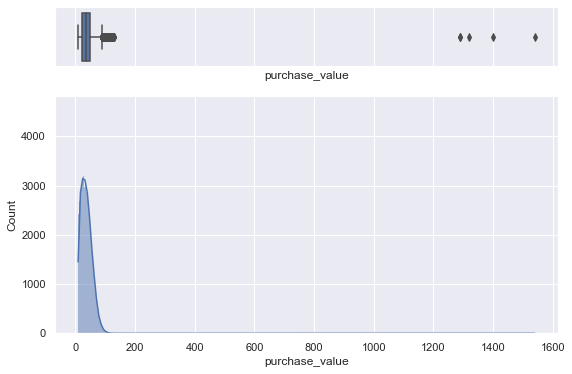

In [5]:
# TASK 1 & 2: Visual, Non-visual plots and identification of data quality issues.

#plot a histogram & boxplot to see the distribution and quartiles of the purchase values.
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.20, 0.80)})

sns.boxplot(data=df, x='purchase_value', ax=ax_box)
sns.histplot(data=df, x='purchase_value', ax=ax_hist, kde=True)

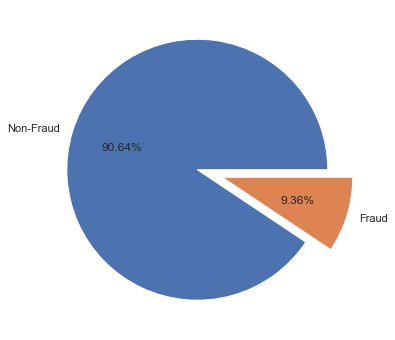

In [6]:
# massive outliers here - dictionary says value should be capped at 400, so we will hard cap the value at that and remove outliers.
# we can clean the data later in the 'cleaned' dataset, with the condition to remove rows in which purchase value is over 400.

# The most notable data is the is_fraud value, which will help us with our data exploration later
# Draw piechart to determine percentage of fraud cases in dataset
explode = (0, 0.2) #explode second slice
labels = 'Non-Fraud', 'Fraud'
figure1, ax1 = plt.subplots()

ax1.pie(df.is_fraud.value_counts(), explode=explode, autopct='%.2f%%', labels=labels) # pie charts, to 2dp
plt.show()

In [7]:
# Around 9.36% of cases are fraud in the raw data.

<AxesSubplot:xlabel='browser', ylabel='count'>

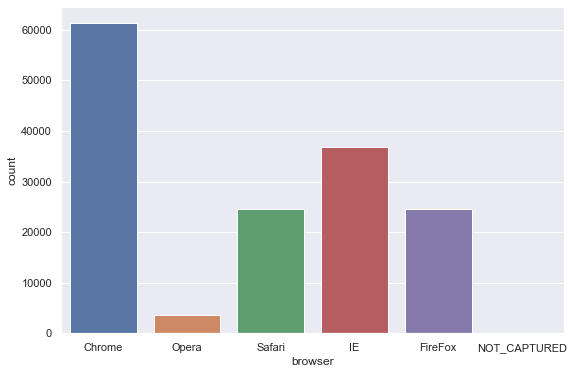

In [8]:
# plot a to figure out the distribution of browser users
sns.countplot(data=df, x='browser')

In [9]:
# doesn't seem too interesting, looks pretty typical, although there is the 'not_captured' 
# column of - it's not in the dictionary so we can remove it later.

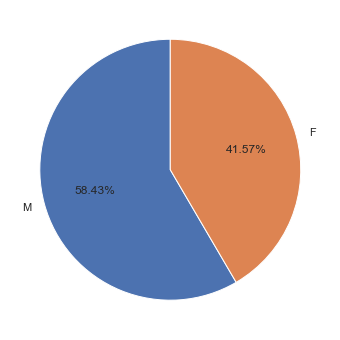

In [10]:
# we can plot the 'sex' data into a piechart to see the distribution of sexes
labels2 = 'M', 'F'
figure1, ax1 = plt.subplots()

ax1.pie(df.sex.value_counts(), autopct='%.2f%%', labels=labels2, startangle=90) # pie charts, to 2dp
plt.show()

In [11]:
# More males than females, no other values.

q1=26.0, q3=39.0, median=32.0, IQR=13.0, UppFence=58.5,LwrFence=6.5


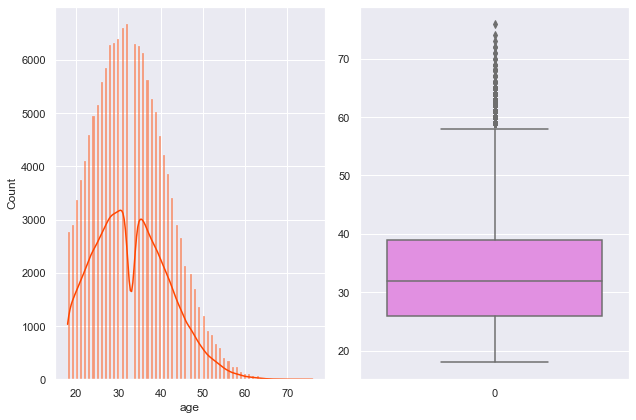

In [12]:
# age graphs
# calculating fences
q1= df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
median = df['age'].median()
IQR = q3 - q1
UppFence = q3 + 1.5*IQR
LwrFence = q1 - 1.5*IQR
print("q1={}, q3={}, median={}, IQR={}, UppFence={},LwrFence={}".format(q1,q3,median,IQR,UppFence,LwrFence))

# plotting graphs
fig, ax = plt.subplots(1,2)
sns.histplot(df['age'], kde=True, color='orangered', ax=ax[0])
sns.boxplot(data=df['age'], ax=ax[1], color='violet')
plt.tight_layout()

In [13]:
# Interesting, seems like an entire age band is missing. We can clean that up later - other than that, looks like a fairly typical distribution.
# while the boxplot shows that there are values outside the upperfence, they are realistic so I will not remove them.

<AxesSubplot:xlabel='source', ylabel='count'>

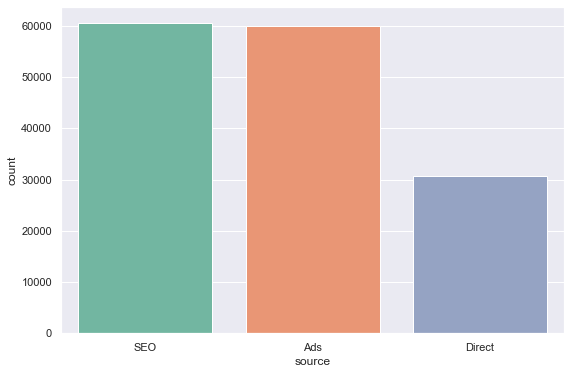

In [14]:
# Plot a countplot to see the source of the purchases
sns.countplot(data=df, x='source', palette="Set2")

In [15]:
# Nothing odd, ads and SEO have about the same count.

<AxesSubplot:xlabel='days', ylabel='Count'>

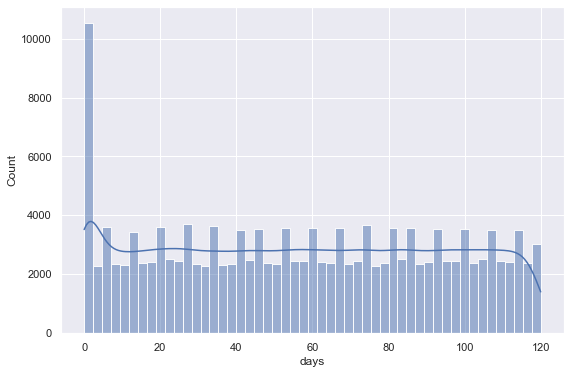

In [16]:
# Plot a histogram to see the distribution of days
sns.histplot(df['days'], kde=True)

In [17]:
# Interesting, there is a spike on day 0 but after that the smoothed value remains almost constant. No glaring missing values.

<AxesSubplot:>

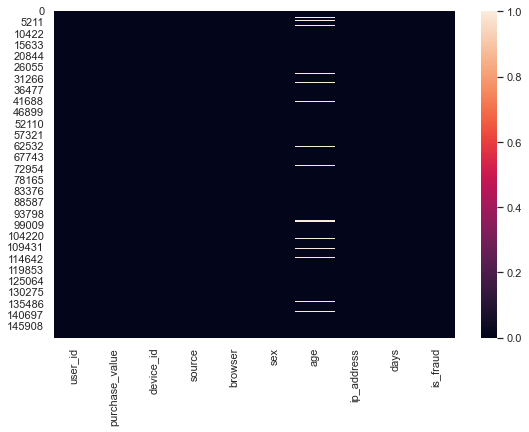

In [18]:
# We can use a heatmap to check for mussing values, by plotting the .isnull() values of all the columns into a heatmap
# white bars would represent null values
sns.heatmap(data=df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac8451ed60>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac845074c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac8451e9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ac84507be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ac84507f70>],
 'means': []}

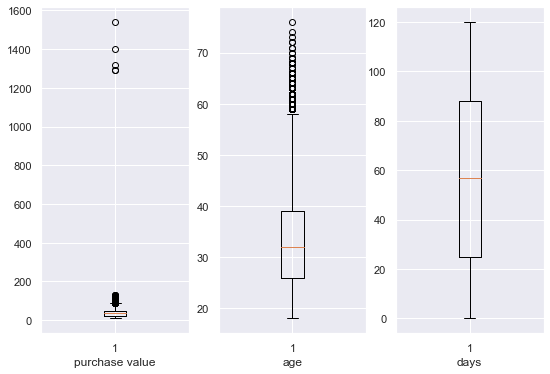

In [19]:
# we use boxplots to plot for outliers in the numerical data
# and to do a non-visual inspection and correct any wrong datatypes.
df_num = df.select_dtypes(include=['int','float'])
plt.subplot(1,3,1)
plt.xlabel('purchase value')
plt.boxplot(df_num['purchase_value'].dropna())
plt.subplot(1,3,2)
plt.xlabel('age')
plt.boxplot(df_num['age'].dropna())
plt.subplot(1,3,3)
plt.xlabel('days')
plt.boxplot(df_num['days'].dropna())
# we use .dropna() to clear any missing values first.

In [20]:
# As discovered earlier, purchase_value has outliers that we could remove.
# While age has values over Q3, those values are realistic and within the range given in the dictionary
# days does not have any values over the q3 or under the q1, so it can be left as is.

# Lastly, we can check for duplicates in the numerical dataset, via the .duplicated() function
df_num.loc[df_num.duplicated(),:]

,user_id,purchase_value,age,ip_address,days,is_fraud


In [21]:
# No duplicates.

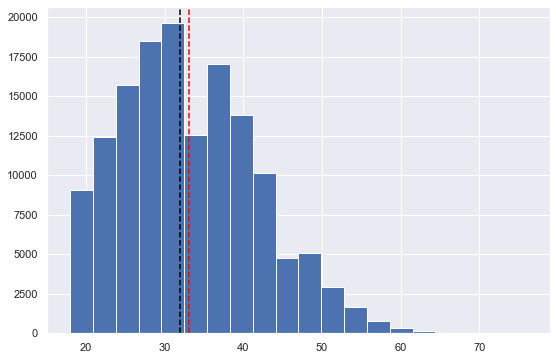

In [22]:
# Before we deal with the missing values in 'age', we have to decide if we want to remove the rows or impute them. 
# We can decide by checking the distribution of the column

plt.hist(df['age'], bins=20)
plt.axvline(x=df['age'].mean(), linestyle='dashed', color='red')
plt.axvline(x=df['age'].median(), linestyle='dashed', color='black')
plt.show()

In [23]:
# 'age' is roughly normally distributed, and hence the mean is not skewed by outliers and a good estimate of central location. hence, we will impute with mean.

In [24]:
# TASK 3: Cleaning of data

# First, make a copy of the dataframe so we do not overwrite it
df_clean = df.copy()
# then, we impute the missing values in 'age' with the mean.
df_clean['age'].fillna(value=df['age'].mean(), axis=0, inplace=True)
# next, we drop rows with missing values
df_clean = df_clean.dropna(axis=0, how='any') 
# We can remove duplicate rows with .drop_duplicates
df_clean = df_clean.drop_duplicates()

# Datatype Fixing

# user_id is for identification purposes are not meant for calculation, so we should convert it into a string
df_clean = df_clean.astype({'user_id':'str'})

# purchase value is meant for calculations, so interger is a good datatype. We can leave it
# device_id is also already a string ('object' for python-like string, not the C-type string)
# source, browser and sex are all also strings, and as no alculation is required of them we can leave them too.

# Age can be changed to a interger to facilitate calculations
df_clean = df_clean.astype({'age':'int'})

# ip_address is also for identification purposes only and hence we can convert it into a string
df_clean = df_clean.astype({'ip_address':'str'}) 

# days can be used for calculation so we can leave it as is

#is_fraud can boolean as it is binary
df_clean = df_clean.astype({'is_fraud':'bool'}) 


# We can remove the rows with NOT_CAPTURED in the browser column that we found in the bar chart.
df_clean = df_clean[df_clean.browser != 'NOT_CAPTURED']

# Remove the rows in column purchase_value over 400
df_clean = df_clean[~(df_clean['purchase_value'] >= 400)]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151073 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         151073 non-null  object
 1   purchase_value  151073 non-null  int64 
 2   device_id       151073 non-null  object
 3   source          151073 non-null  object
 4   browser         151073 non-null  object
 5   sex             151073 non-null  object
 6   age             151073 non-null  int32 
 7   ip_address      151073 non-null  object
 8   days            151073 non-null  int64 
 9   is_fraud        151073 non-null  bool  
dtypes: bool(1), int32(1), int64(2), object(6)
memory usage: 11.1+ MB


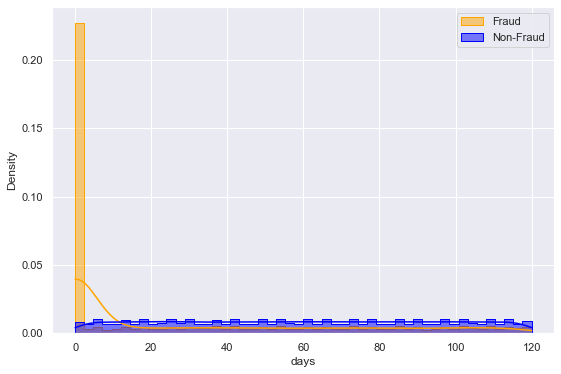

In [25]:
# TASK 4: Further Exploration

# We can try to plot 2 histograms with the fraud vs non fraud data with concentration of days from signing up to making a purchase - 
# it's possible that fraud purchases are more skewed to new signups.

# A few comments on the params passed
# bins=50 - we choose a lower bin value so that the histogram is less 'spotty', won't affect kde anyways
# stat='density' - This normalizes the areas of both hisotgrams to 1, making them directly comparable
#           - (pct(%) or probability would result in the non fraud histogram being notably smaller.) 
# kde - kernel density emulation helps us build an easily readable smoothed probabiltiy line, making the skew easy to see

sns.histplot(df_clean[df_clean['is_fraud']==1]['days'], bins=50, kde=True, stat='density', color='orange', element="step", label='Fraud')
sns.histplot(df_clean[df_clean['is_fraud']==0]['days'], bins=50, kde=True, stat='density', color='blue', element="step", label='Non-Fraud')
plt.legend()
plt.show()

In [26]:
# We can see that the amount of fraud cases (orange) from accounts amade on the day of purchase is very high, leading to a spike in the fraud histogram,
# while the non-fraud (blue) histogram stays nearly flat.

# This shows that 0-day purchases are highly likely to be fraud, and could be scrutinized further

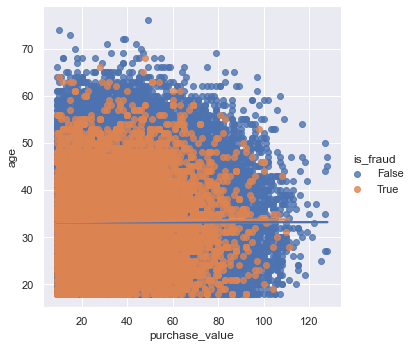

In [27]:
# scatterplot of age vs purchase value, with hue set to 'is_fraud':
sns.lmplot(data=df_clean, x='purchase_value', y='age', hue='is_fraud')

In [28]:
# While the linear regression line shows somewhat of the same trend relating to age vs purchase value in the data,
# the non-fraud data has a far higher amount of 'outliers', or data further from 0,0.

# Therefore, we can conclude that purchases with either high 'age' values, and/or high purchase values are less likely to be fraud.
# However, it is also plausible that this is because there is a smaller sample of fraud cases (about 10% before cleaning the data.